Vehicle velocity model with slope: closed loop model.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy import constants

In [4]:
def eval_model(model, xs):
    return np.array(list(map(model, xs)))

$\frac{dv(t)}{dt} = \frac{1}{m} [ F_p K_c (v_{SP}(t) - v(t)) - \frac{1}{2} \rho A C_d v(t)^2 ] - g sin(\theta)$

In [5]:
# Mass (car + load), kg
m = 700

# Thrust parameter, (N / %pedal)
F_p = 30

# Air density, kg/m^3
rho = 1.225 

# vehicle cross-sectional area (m^2)
A = 5

# Drag coefficient
C_d = 0.24

# Controller gain
K_c = 13.037
#K_c = 20.

def vehicle_model(v, t, setpoint_func, disturbance_func):
    
    v_sp = setpoint_func(t)
    theta = disturbance_func(t)
        
    drive = F_p * K_c * (v_sp - v)
    drag = 0.5 * rho * A * C_d * (v**2)
    slope = constants.g * np.sin(theta)
    
    return (1. / m) * (drive - drag) - slope
    

In [6]:
def setpoint_strategy(t):
    
    if t < 25:
        return 0
    
    if t >= 25 and t < 100:
        return 10
    
    if t >= 100 and t < 150:
        return 15
    
    if t >= 150:
        return 10
    
    
def no_slope(t):
    return 0

In [7]:
t = np.linspace(0, 200, 100)

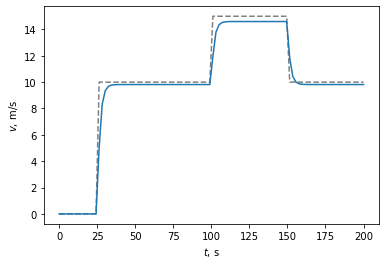

In [8]:
initial = 0

v_sim = odeint(vehicle_model, initial, t, args=(setpoint_strategy, no_slope))

plt.plot(t, eval_model(setpoint_strategy, t), '--', color='gray')
plt.plot(t, v_sim)

plt.xlabel('$t$, s')
plt.ylabel('$v$, m/s')
plt.show()

In [9]:
v_sim.reshape(-1)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  5.05010865,  8.33049032,
        9.35621672,  9.67521851,  9.77426157,  9.80499621,  9.8145321 ,
        9.81749061,  9.81840845,  9.81869322,  9.81878158,  9.81880898,
        9.81881747,  9.81882011,  9.81882094,  9.81882119,  9.81882127,
        9.81882129,  9.8188213 ,  9.81882131,  9.81882131,  9.81882131,
        9.81882131,  9.81882131,  9.8188213 ,  9.8188213 ,  9.8188213 ,
        9.8188213 ,  9.8188213 ,  9.8188213 ,  9.8188213 ,  9.8188213 ,
        9.8188213 ,  9.8188213 ,  9.8188213 ,  9.8188213 ,  9.8188213 ,
       11.95342076, 13.79236958, 14.35383771, 14.52475482, 14.57673667,
       14.59254181, 14.59734696, 14.59880779, 14.59925191, 14.59938696,
       14.59942799, 14.59944045, 14.59944424, 14.59944542, 14.59944577,
       14.59944587, 14.5994459 , 14.59944592, 14.59944592, 14.59

In [10]:
error = eval_model(setpoint_strategy, t) - v_sim.reshape(-1)

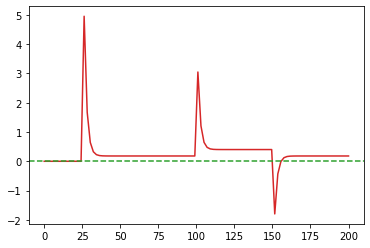

In [11]:
plt.plot(t, error, color='tab:red')
plt.axhline(0, linestyle='--', color='tab:green')
plt.show()